In [1]:
import pandas as pd
import numpy as np
import pickle
import copy

# PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## For Multi class

In [2]:
names = ['branch_points',  'tips',  'height',  'width',  'depth',   'stems',  'avg_thickness',  'total_length', 
         'total_surface',  'total_volume',  'max_path_dist_to_soma', 'max_branch_order', 'max_segment_path_length',
         'median_intermediate_segment_pl',  'median_terminal_segment_pl', 'median_path_angle', 'max_path_angle',
         'median_tortuosity', 'max_tortuosity', 'min_branch_angle', 'mean_branch_angle', 'max_branch_angle',
         'max_degree', 'tree_asymmetry']
names = [n.replace("_", " ").capitalize() for n in names]

In [3]:
multiclass_models = []
for k, m in enumerate(['bipolar', 'v1l23', 'v1l4','v1l5']):
    f = open("./data/classification/mc models/%s_full.pkl"%m,'rb')
    multiclass_models.append(pickle.load(f))
    f.close()

/gpfs01/berens/user/slaturnus/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/gpfs01/berens/user/slaturnus/.local/lib/python3.5/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import colors

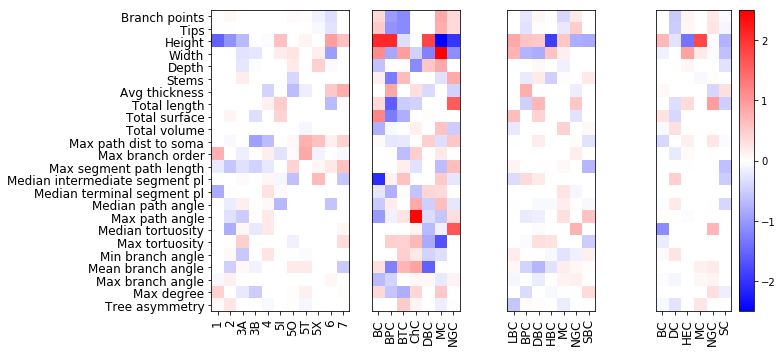

In [5]:
images = []
fig = plt.figure(figsize=(11,5))
for k,m in enumerate(multiclass_models):

    plt.subplot(1,4,k+1)
    C = copy.copy(m.coef_.T)
    C_ = C
    C_[C == 0] = np.nan
    
    images.append(plt.imshow(C_, cmap='bwr'))


    classes = [c.replace("CBC", "") for c in m.classes_]
    if k == 2:
        classes = ['LBC', 'BPC', 'DBC', 'HBC', 'MC', 'NGC', 'SBC']
    plt.xticks(range(len(classes)))
    _ = plt.gca().set_xticklabels(classes, fontsize=12, rotation=90)
    
    if k ==0:
        plt.yticks(range(len(names)))
        _ = plt.gca().set_yticklabels(names, fontsize=12)
    else:
        plt.yticks([])


norm = colors.Normalize(vmin=-2.5, vmax=2.5)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0])
plt.tight_layout()
